# Limitaciones del computador

Números en computador (aritmética de punto flotante):

$$ 1.234 = (-1)^n\cdot 1234 \cdot 10^{-3} $$

- Signo  (n, 0 o 1)
- Mantisa (1234)
- Base (10)
- Exponente (-3)

(en la práctica es todo en base 2: $(-1)^n\cdot 0110\cdot  2^{l}$)

In [1]:
a = 2.0
print(type(a))
print("{:.3f}".format(1/3))
print("{:.7f}".format(1/3))
print("{:.12f}".format(1/3))
print("{:.16f}".format(1/3))
print("{:.20f}".format(1/3))
print("{:.50f}".format(1/3))

<class 'float'>
0.333
0.3333333
0.333333333333
0.3333333333333333
0.33333333333333331483
0.33333333333333331482961625624739099293947219848633


# Aproximación matemática

Fórmula de Taylor para aproximar funciones

$$ f(x) = f(x_0) + f'(x_0)(x - x_0) + \frac{ f^2(x_0) }{2!}(x-x_0)^2 + \cdot\cdot\cdot + \frac{f^{(k)}(x_0)}{k!}(x-x_0)^k + O((x-x_0)^{k+1}) $$

donde el error es de la forma

$$ e_{k+1} =  \frac{f^{(k+1)}(\xi)}{(k+1)!}(x-x_0)^{k+1} $$

$$ f(x) = f(x_0) + f'(x_0)(x - x_0) + \frac{ f'(x_0) }{2!}(x-x_0)^2 + \cdot\cdot\cdot + \frac{f^(k)(x_0)}{k!}(x-x_0)^k + O((x-x_0)^{k+1}) $$

- Aproximar función ($h=x-x_0$):

$$ f(x) = f(x_0) + f'(x_0)(x-x_0) + O(h^2) $$

- Aproximar derivada:

$$ \frac{f(x) - f(x_0)}{x - x_0} = f'(x_0) + O(h) $$

In [2]:
import numpy as np
from math import factorial
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def df(x):
    return np.cos(x)

def dfk(x,k):
    res = k%4
    if res == 0:
        return f(x)
    elif res == 1:
        return df(x)
    elif res == 2:
        return -np.sin(x)
    else:
        return -np.cos(x) 

def f_Taylor(x, x0, k):
    out = f(x0)
    h = x-x0
    for j in range(k):
        out += dfk(x0, j+1) / factorial(j+1) * h**(j+1)
    return out

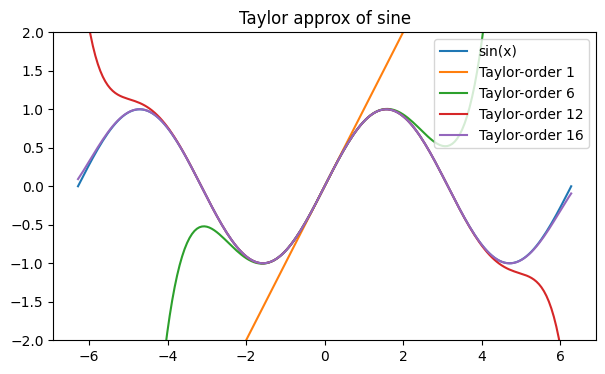

In [3]:
xs = np.linspace(-2*np.pi,2*np.pi,200)
fs = f(xs)  # [ f(x) for x in xs ]

plt.figure(figsize=(7, 4))
plt.plot(xs,fs,label="sin(x)")
for k in (1,6,12,16):
    fs_taylor = f_Taylor(xs, 0.0, k)
    plt.plot(xs,fs_taylor,label="Taylor-order {}".format(k))
    plt.ylim(-2,2)
    plt.legend() 
plt.title("Taylor approx of sine".format(k)); plt.show()

# Orden de convergencia

Recordemos que 

- Aproximar función ($h=x-x_0$):

$$ f(x) = f(x_0) + f'(x_0)(x-x_0) + O(h^2) $$

- Aproximar derivada:

$$ \frac{f(x) - f(x_0)}{x - x_0} = f'(x_0) + O(h) $$

Orden de convergencia es el exponente en $O(h^k)$

In [4]:
def f_approx(x, h):
    return f(x) + df(x) * h

errors_f=[]
errors_df = []
errors_df2 = []
hs = [10**k for k in range(1, -12, -1)]
x = 0.1
for h in hs:
    error_f = abs(f(x+h) - f_approx(x, h)) # Aproximación de función
    errors_f.append(error_f)
    error_df = abs( (f(x+h) - f(x))/(h) - df(x) ) # Aproximación de derivada
    errors_df.append(error_df)
    error_df2 = abs( (f(x+h) - f(x-h))/(2*h) - df(x) ) # Aproximación de derivada
    errors_df2.append(error_df2)

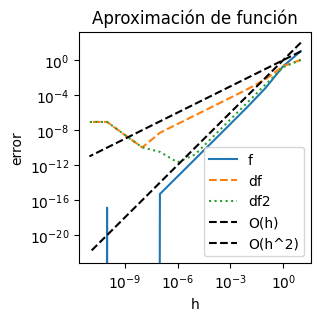

In [7]:
plt.figure(figsize=(3, 3))
plt.loglog(hs, errors_f, label = "f")
plt.loglog(hs, errors_df, linestyle='dashed', label="df")
plt.loglog(hs, errors_df2, linestyle='dotted', label="df2")
plt.loglog(hs, hs, linestyle='dashed', label='O(h)', color='black')
plt.loglog(hs, [h**2 for h in hs], linestyle='dashed', label='O(h^2)', color='black')
plt.legend()
plt.title("Aproximación de función")
plt.xlabel("h")
plt.ylabel("error")
plt.show()

# Diferencias finitas

Para derivadas de segundo orden: 

$$ 
\begin{aligned} 
f''(x) &\approx 1/h\left(f'(x+h) - f'(x)\right) \\
       &\approx 1/h \left( \frac{1}{h}\left(f(x+h)-f(x)\right) - \frac{1}{h}\left(f(x) - f(x-h)\right)\right)
\end{aligned}
$$

Luego
 
 - Primera derivada:

$$ f'(x) \approx \frac 1 h \left[ f(x+h) - f(x) \right] \qquad \text{(Diferencias hacia adelante)}$$
$$ f'(x) \approx \frac 1 h \left[ f(x) - f(x-h) \right] \qquad\text{(Diferencias hacia atrás)}$$
$$ f'(x) \approx \frac 1 {2h} \left[ f(x+h) - f(x-h) \right] \qquad\text{(Diferencias centradas)}$$

 - Segunda derivada:

$$ f''(x) \approx  \frac{1}{h^2} \left[ f(x+h)-2f(x)+ f(x-h)\right] $$

### Análisis del error (pizarra)

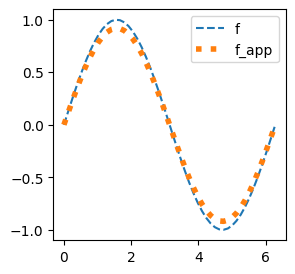

In [8]:
def f(x): 
    return np.sin(x)
def df2_approx(x,h):
    return 1/h**2 * (f(x+h) - 2 * f(x) + f(x-h) )

h = 1.0
xs = np.linspace(0,2*np.pi)
fs = f(xs)
fs_app = df2_approx(xs, h)
plt.figure(figsize=(3, 3))
plt.plot(xs, fs, linestyle='dashed', label="f")
plt.plot(xs,-fs_app, linestyle='dotted', linewidth=4, label="f_app")
plt.legend()
plt.show()

# Discretización y representación matricial

Forma simple de aproximar una función:

- Considerar intervalo $I=(a,b)$
- Considerar un conjunto de puntos en el intervalo $\{x_n\}_{n=1}^N$  (malla)
- Por simplicidad, $x_{i+1} - x_i = h > 0$
- Considerar el vector de malla $\vec f_N$ dado por:

$$ \vec f_N = (f(x_1), f(x_2), \cdot\cdot\cdot, f(x_N)) $$

- El operador derivada $f\mapsto Df$ es lineal. Buscamos algo similar con matrices.

Asumamos diferencias hacia adelante:
$$ f'(x) \approx \frac 1 h (f(x+h) - f(x)) $$

- En cada punto de malla tenemos derivada:

$$ f'(x_i) \approx \frac 1 h (f(x+h) - f(x)) = \frac 1 h (f(x_{i+1}) - f(x_i)) $$

- Esto es un operador lineal en cada punto:

$$ \frac 1 h (f(x_{i+1}) - f(x_i)) = [0 \quad 0 \cdot\cdot\cdot  -1/h \quad 1/h \cdot\cdot\cdot 0 \quad 0] \vec f $$

- Esto induce una matriz


Matrix de diferencias hacia adelante:
$$ \begin{bmatrix} f'(x_1) \\ f'(x_2) \\ \vdots \\ f'(x_{N-1}) \\ f'(x_N) \end{bmatrix} = \begin{bmatrix} -1/h & 1/h  & 0   & \dots & 0 \\ 
                  0  & -1/h & 1/h & 0 \dots & 0 \\
                  \vdots & \vdots & & & \\
                  0 & \dots & 0 -1/h & 1/h \\
                  0 & \dots & 0 -1/h & 1/h \\\end{bmatrix}\vec f = \mathbf{D_h} \vec f $$

- Última fila usa diferencias hacia atrás (no existe $x_{N+1}$)
- Matriz es singular ya que si $\mathbb{1} = (1,1,\dots,1)$, $\mathbf{D_h} \mathbb{1} =\vec 0$
- Este kernel es el mismo que el de la derivada como operador!

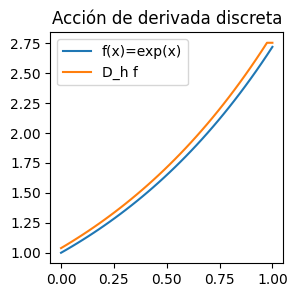

In [25]:
Nints = 40 # Número de intervalos
Npts = Nints # Número de puntos
h = 1.0/Nints

xs = np.linspace(0,1,Npts)
Dh = np.zeros((Npts, Npts))
for i in range(Npts-1):
        Dh[i,i] = -1/h
        Dh[i,i+1] = 1/h
Dh[-1,-2] = -1/h
Dh[-1,-1] = 1/h
fs = np.exp(xs)
dfs = Dh @ fs
plt.figure(figsize=(3, 3))
plt.plot(xs, fs, label="f(x)=exp(x)")
plt.plot(xs, dfs, label="D_h f")
plt.legend()
plt.title("Acción de derivada discreta")
plt.show()

# Ecuación de segundo orden

Encontrar $u:(0,1)\to \mathbb{R}$ tal que

$$ \begin{aligned}
    a u''(x) + b u'(x) + c u(x) &= f(x) \\
    u(0) &= u_0 \\
    u(1) &= u_1
\end{aligned}$$